# Shear-switched-on part (autoconversion is below). 

In [93]:
!ls /Users/bmapes/Box/Tsai_Mapes_CM1_2024data_from_weather2/CM1_RAD4K_120x120_autooff_SWITCHON_EXP

run                      timeseries2D.nc
src                      timeseries3D_t170-259.nc


In [6]:
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [8]:
ds = xr.open_dataset('/Users/bmapes/Box/Tsai_Mapes_CM1/cm1out_2Dvars_shearonbelt.nc')

In [9]:
ds

<xarray.Dataset>
Dimensions:  (time: 361, nj: 120, ni: 120)
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 00:20:00 ... 5 days 00:00:00
Dimensions without coordinates: nj, ni
Data variables: (12/15)
    rain     (time, nj, ni) float32 ...
    sws      (time, nj, ni) float32 ...
    srs      (time, nj, ni) float32 ...
    sus      (time, nj, ni) float32 ...
    cref     (time, nj, ni) float32 ...
    v10      (time, nj, ni) float32 ...
    ...       ...
    cwp      (time, nj, ni) float32 ...
    lwp      (time, nj, ni) float32 ...
    pwat     (time, nj, ni) float32 ...
    cape     (time, nj, ni) float32 ...
    cin      (time, nj, ni) float32 ...
    lfc      (time, nj, ni) float32 ...
Attributes: (12/71)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0
    history:      Fri Sep  6 15:09:04 2024: ncrcat -v rain,pwat,cwp,lwp,v10,t...
    NCO:          netCDF Operators version 5.0.2 (Homepage = http://nco.sf.ne...

In [7]:
timelatP = ds.prate.mean(dim='lon')

In [9]:
timelatP.coarsen

<xarray.DataArray 'prate' (time: 1440, lat: 120)>
array([[9.12986507e-05, 3.49868526e-04, 7.18977753e-05, ...,
        8.10957426e-05, 1.15718562e-04, 6.58433710e-05],
       [7.57659291e-05, 4.59780567e-04, 1.05242587e-04, ...,
        8.60785367e-05, 1.22088633e-04, 5.79625303e-05],
       [5.78804647e-05, 1.76538742e-04, 7.16614013e-05, ...,
        8.31331490e-05, 7.21338656e-05, 4.26615516e-05],
       ...,
       [6.49076446e-06, 2.49513541e-05, 3.94835188e-05, ...,
        6.30167597e-06, 1.95923021e-05, 1.47235405e-05],
       [3.99212604e-06, 1.52833309e-05, 2.29942380e-05, ...,
        2.94096003e-06, 1.06170673e-05, 9.08529728e-06],
       [3.96359337e-06, 1.20528321e-05, 1.46451030e-05, ...,
        1.29458465e-06, 5.65378787e-06, 5.92447168e-06]], dtype=float32)
Coordinates:
  * time     (time) object 0001-07-03 00:00:00 ... 1440-07-03 00:00:00
  * lat      (lat) float64 1.0 3.0 5.0 7.0 9.0 ... 231.0 233.0 235.0 237.0 239.0

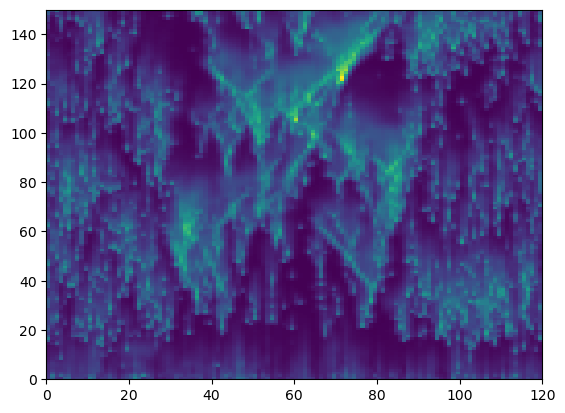

In [44]:
plt.pcolormesh( np.sqrt(ds.prate.mean(dim='lon'))[0:150,:] )

In [15]:
ds.time.

<xarray.DataArray 'time' (time: 1440)>
array([cftime.DatetimeGregorian(1, 7, 3, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2, 7, 3, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(3, 7, 3, 0, 0, 0, 0, has_year_zero=False), ...,
       cftime.DatetimeGregorian(1438, 7, 3, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1439, 7, 3, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1440, 7, 3, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 0001-07-03 00:00:00 ... 1440-07-03 00:00:00
Attributes:
    standard_name:  time
    axis:           T

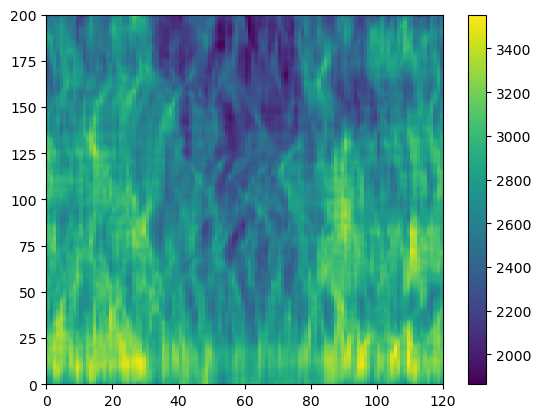

In [20]:
plt.pcolormesh( ds.cape.mean(dim='lon')[0:200,:] ); plt.colorbar()

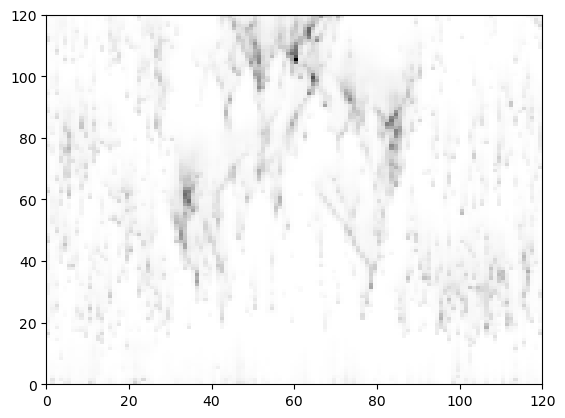

In [48]:
plt.pcolormesh(  ds.prate.mean(dim='lon').coarsen(lat=1).mean()[0:120,:], cmap='Greys' )

# Autoconversion switched off suddenly at 180 x 20minutes 

In [94]:
!ls /Users/bmapes/Box/Tsai_Mapes_CM1_2024data_from_weather2/CM1_RAD4K_120x120_autooff_SWITCHON_EXP

run                      timeseries2D.nc
src                      timeseries3D_t170-259.nc


In [95]:
ds = xr.open_dataset('/Users/bmapes/Box/Tsai_Mapes_CM1_2024data_from_weather2/CM1_RAD4K_120x120_autooff_SWITCHON_EXP/timeseries2D.nc')
ds3d = xr.open_dataset('/Users/bmapes/Box/Tsai_Mapes_CM1_2024data_from_weather2/CM1_RAD4K_120x120_autooff_SWITCHON_EXP/timeseries3D_t170-259.nc')

In [288]:
# ds.time.values/1200000000000
tt = np.arange(0,361/3.,1./3.) 
nj = ds.nj.values

(50.0, 120.0)

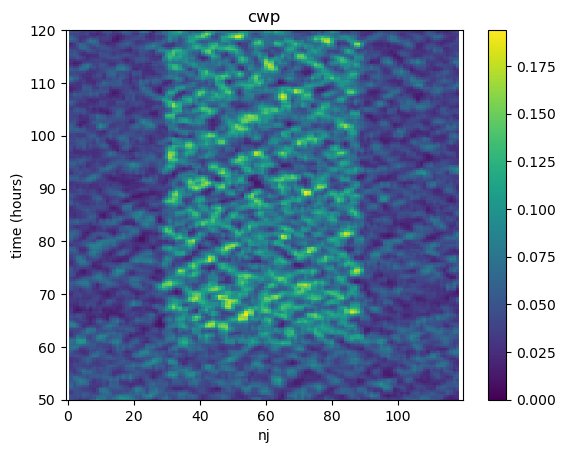

In [291]:
field = 'cwp'

lat_time = ds[field].mean('ni').rolling(time=3,nj=3,center=True).mean()

#plt.figure(figsize=(5,15))
plt.pcolormesh(nj,tt, lat_time); 
plt.xlabel('nj'); plt.ylabel('time (hours)'); 
plt.title(field); plt.colorbar();
plt.ylim([50,120])

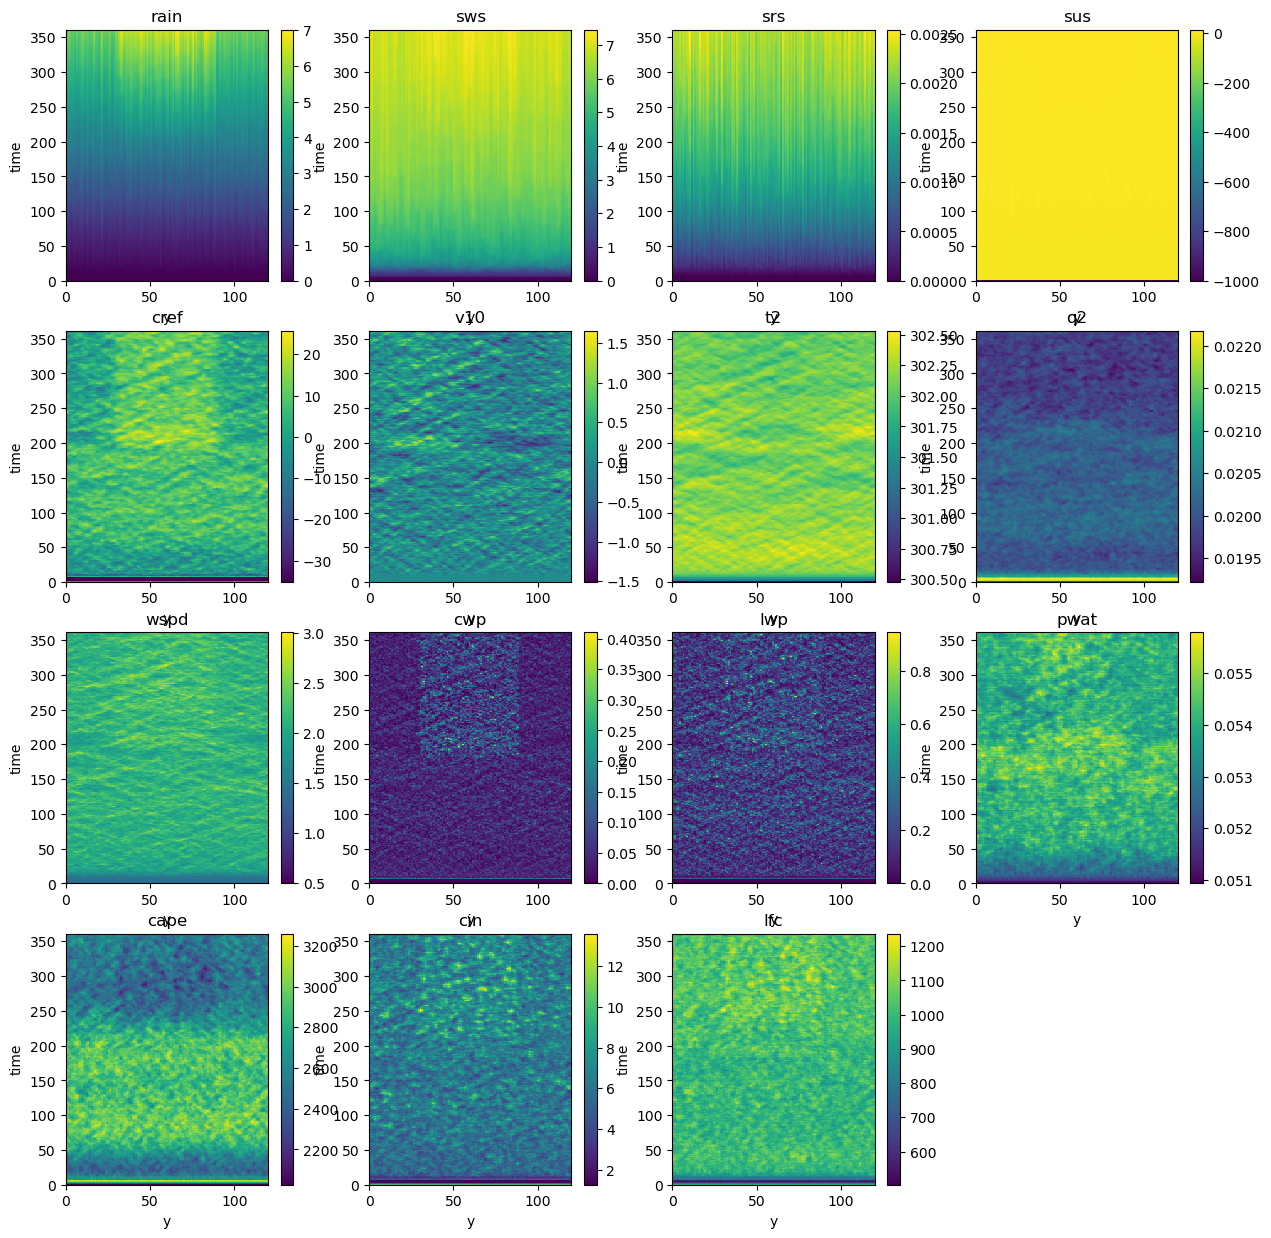

In [102]:
# Plot all the fields 
fields = list( ds.data_vars.keys() )

plt.figure(figsize=(15,15))
for i,field in enumerate(fields):

    plt.subplot(4,4,i+1)
    lat_time = ds[field].mean('ni')
    plt.pcolormesh(lat_time); plt.xlabel('y'); plt.ylabel('time'); plt.title(field); plt.colorbar();

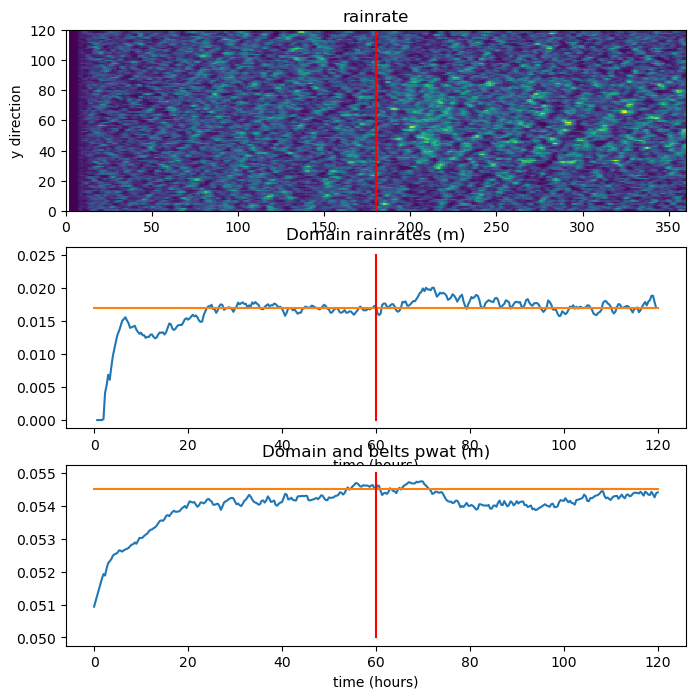

In [506]:
field = 'rainrate'

plt.figure( figsize=(8,8) )

plt.subplot(311)
lat_time = ds['rain'].diff('time').mean('ni').rolling(time=3,nj=1).mean()
plt.pcolormesh(lat_time.transpose()); 
plt.ylabel('y direction'); 
plt.title(field) #; plt.colorbar()
plt.plot([180,180], [0,120], 'red')

plt.subplot(312) 
plt.plot(tt[0:360],  lat_time.mean('nj')); 
#plt.plot(tt[0:360],  lat_time.isel(nj=slice(30,60)).mean('nj')); 
#plt.plot(tt[0:360],  lat_time.isel(nj=slice(0,29)).mean('nj')); 
#plt.plot(tt[0:360],  lat_time.isel(nj=slice(60,90)).mean('nj')); 
#plt.plot(tt[0:360],  lat_time.isel(nj=slice(90,120)).mean('nj')); 
plt.plot([0,360/3],[0.017,0.017])
plt.xlabel('time (hours)'); 
plt.title('Domain rainrates (m)');
plt.plot([60,60], [0,0.025], 'red')

plt.subplot(313) 
#plt.plot([0,360/3],[0.017,0.017])
plt.plot(tt,  ds.pwat.isel(nj=slice(30,90)).mean('nj').mean('ni') )
#plt.plot(tt,  ds.pwat.isel(nj=slice(0,29)).mean('nj').mean('ni') )
#plt.plot(tt,  ds.pwat.isel(nj=slice(91,120)).mean('nj').mean('ni') )
plt.plot([0,360/3],[0.0545,0.0545])
plt.xlabel('time (hours)'); 
plt.title('Domain and belts pwat (m)');
plt.plot([60,60], [0.05,0.055], 'red')

## Stochastic terms: Time and spatial correlations of belt vs. wings

In [359]:
Pbelt1 = lat_time.isel(nj=slice(30,60)).mean('nj')
Pbelt2 = lat_time.isel(nj=slice(60,90)).mean('nj')
Pwing1 = lat_time.isel(nj=slice( 0,30)).mean('nj')
Pwing2 = lat_time.isel(nj=slice(90,120)).mean('nj')

In [432]:
lat_time

<xarray.DataArray 'rain' (time: 360, nj: 120)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03569762, 0.01578856, 0.01738359, ..., 0.01083058, 0.00950627,
        0.02314103],
       [0.02847739, 0.01157681, 0.02028863, ..., 0.01341383, 0.00908671,
        0.01412674],
       [0.01813643, 0.01278036, 0.0237461 , ..., 0.01443506, 0.00785294,
        0.01422365]], dtype=float32)
Coordinates:
  * time     (time) timedelta64[ns] 00:20:00 00:40:00 ... 5 days 00:00:00
Dimensions without coordinates: nj

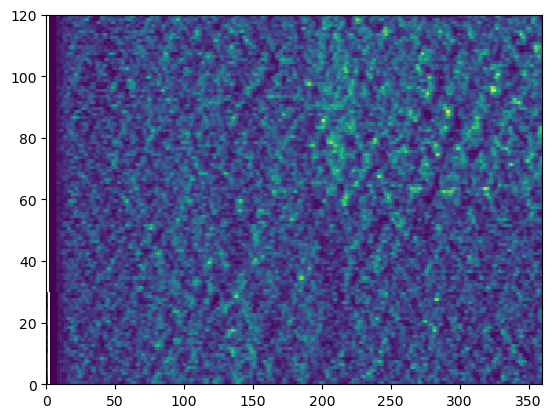

In [431]:
plt.pcolormesh( np.roll(lat_time,(0,30)).transpose() )

In [433]:
rolled = np.roll(lat_time,(0,30)).transpose()

belt_after = lat_time.isel(nj=slice(60,120),time=slice(220,360))
wing_after = lat_time.isel(nj=slice( 0, 60),time=slice(220,360))

belt_b4 = lat_time.isel(nj=slice(60,120),time=slice(60,200))
wing_b4 = lat_time.isel(nj=slice( 0, 60),time=slice(60,200))

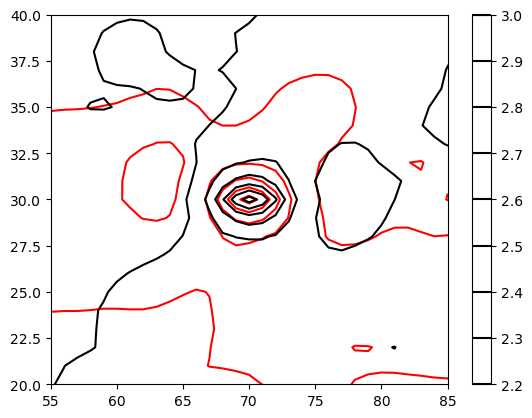

In [499]:
import scipy 

acor_belt_after = scipy.ndimage.correlate(belt_after,belt_after).transpose()
acor_belt_b4    = scipy.ndimage.correlate(belt_b4   ,belt_b4   ).transpose()

plt.contour( acor_belt_after, colors='red'); 
plt.contour( acor_belt_b4   , colors='black'); 

plt.xlim([55,85]) 
plt.ylim([20,40]) 
plt.colorbar()

In [114]:
# ds3d = ...timeseries3D_t170-259.nc')
ds3d

<xarray.Dataset>
Dimensions:   (time: 90, nk: 65, nj: 120, ni: 120, njp1: 121, nkp1: 66)
Coordinates:
  * time      (time) timedelta64[ns] 2 days 08:20:00 ... 3 days 14:00:00
Dimensions without coordinates: nk, nj, ni, njp1, nkp1
Data variables:
    qv        (time, nk, nj, ni) float32 ...
    qc        (time, nk, nj, ni) float32 ...
    qr        (time, nk, nj, ni) float32 ...
    qi        (time, nk, nj, ni) float32 ...
    qs        (time, nk, nj, ni) float32 ...
    buoyancy  (time, nk, nj, ni) float32 ...
    v         (time, nk, njp1, ni) float32 -1.121 -0.6576 ... -0.2692 -0.2492
    w         (time, nkp1, nj, ni) float32 ...
Attributes: (12/71)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0
    history:      Fri Sep  6 19:20:36 2024: ncrcat -v qc,qr,qi,qs,qv,v,w,buoy...
    NCO:          netCDF Operators version 5.0.2 (Homepage = http://nco.sf.ne...

In [305]:
# for plot labels 
t = np.arange(-200,1600,20)/60 # 60 values, in minutes, convert to hous with division by 60|
z = np.arange(1,66,1)

In [306]:
# Make mean data in belt and wings 

beltmean = ds3d.isel(nj=slice(30,90)).mean('nj').mean('ni')
wingmean =(ds3d.isel(nj=slice(0,29)).mean('nj')*0.5 + ds3d.isel(nj=slice(91,120-1)).mean('nj')*0.5) .mean('ni')

# for staggered njp1 too (v uses this coordinate)
beltmean = beltmean.isel(njp1=slice(30,90)).mean('njp1')
wingmean = wingmean.isel(njp1=slice( 0,29)).mean('njp1')*0.5 + wingmean.isel(njp1=slice(91,120-1)).mean('njp1')*0.5

In [307]:
beltmean

<xarray.Dataset>
Dimensions:   (time: 90, nk: 65, nkp1: 66)
Coordinates:
  * time      (time) timedelta64[ns] 2 days 08:20:00 ... 3 days 14:00:00
Dimensions without coordinates: nk, nkp1
Data variables:
    qv        (time, nk) float32 0.01895 0.01799 0.01758 ... 8.812e-06 7.681e-06
    qc        (time, nk) float32 9.054e-11 9.376e-11 1.22e-10 ... 0.0 0.0 0.0
    qr        (time, nk) float32 2.358e-05 2.344e-05 2.345e-05 ... 0.0 0.0 0.0
    qi        (time, nk) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    qs        (time, nk) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    buoyancy  (time, nk) float32 0.06273 0.0378 0.02417 ... -0.004146 0.004801
    v         (time, nk) float32 -0.02719 -0.02808 -0.02809 ... 0.0197 0.02052
    w         (time, nkp1) float32 0.0 -0.0002681 -0.0006584 ... 0.0002275 0.0

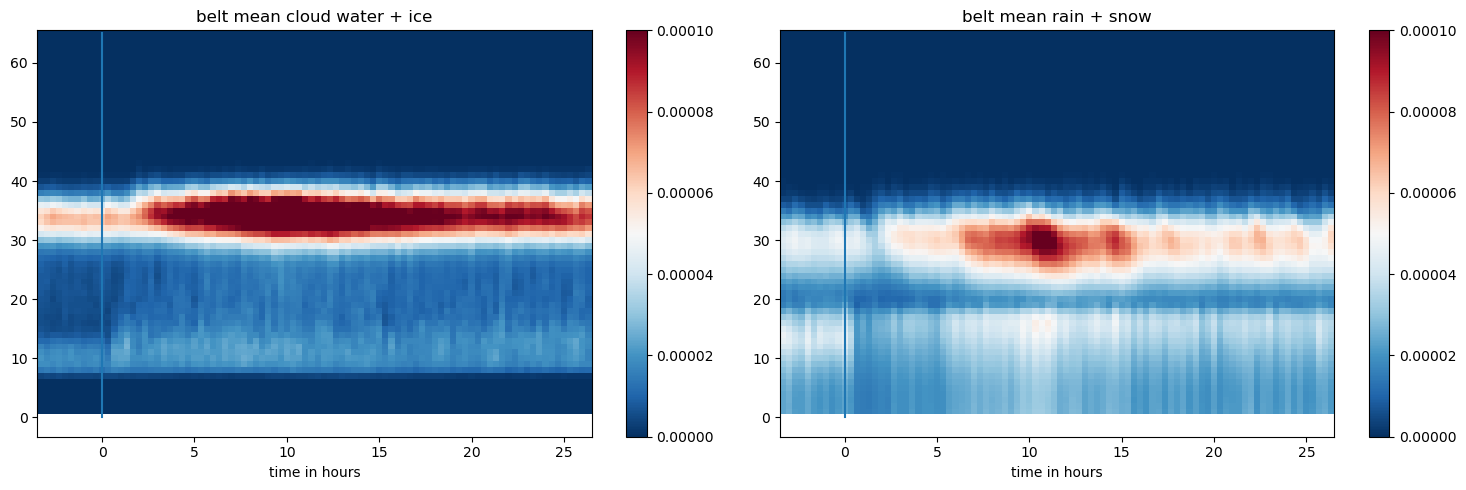

In [316]:
# BELT MEAN VALUES: CLOUD

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z, (beltmean.qc + beltmean.qi).transpose() , cmap='RdBu_r', vmax=1e-4); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt mean cloud water + ice');

plt.subplot(122) 
plt.pcolormesh(t,z, (beltmean.qr + beltmean.qs).transpose() , cmap='RdBu_r', vmax=1e-4); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt mean rain + snow');

plt.tight_layout()

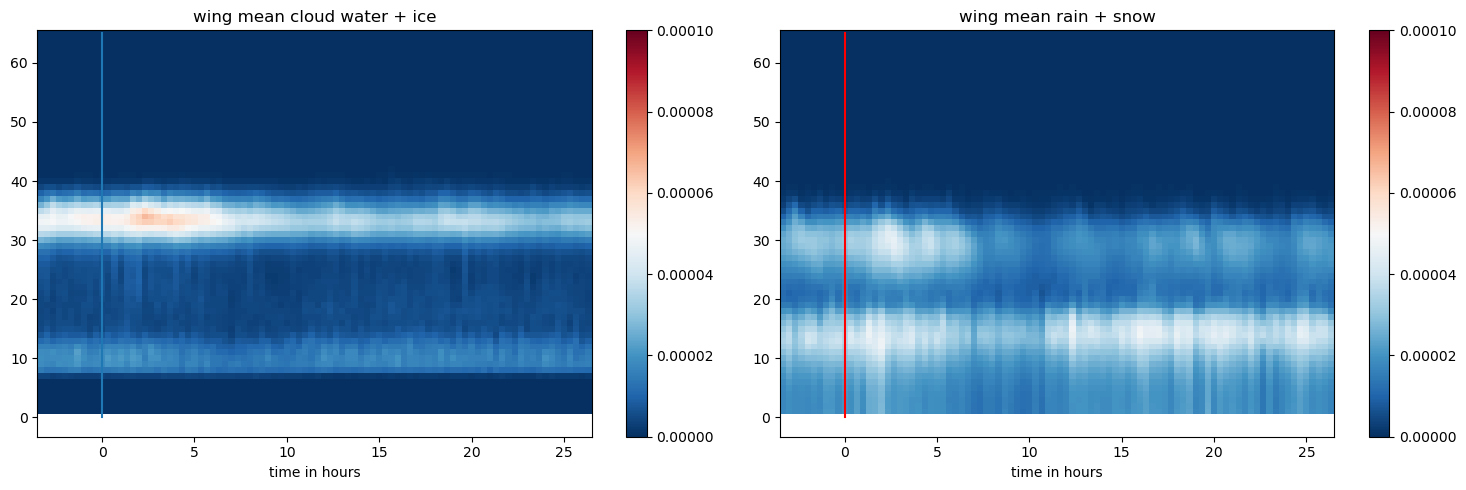

In [317]:
# WING MEAN VALUES: CLOUD

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z, (wingmean.qc + wingmean.qi).transpose() , cmap='RdBu_r', vmax=1e-4); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('wing mean cloud water + ice');

plt.subplot(122) 
plt.pcolormesh(t,z, (wingmean.qr + wingmean.qs).transpose() , cmap='RdBu_r', vmax=1e-4); plt.colorbar()
plt.plot([0,0],[0,65],'red')
plt.xlabel('time in hours')
plt.title('wing mean rain + snow');

plt.tight_layout()

In [349]:
ds3d.buoyancy[0:5].mean(dim=['time','nj','ni'])


<xarray.DataArray 'buoyancy' (nk: 65)>
array([ 6.47175834e-02,  3.94957326e-02,  2.55351644e-02,  1.94440726e-02,
        1.31538119e-02,  6.84345560e-03,  2.12641410e-03, -2.02346523e-03,
       -3.86917964e-03, -2.74901418e-03, -3.51960282e-03, -4.86853113e-03,
       -4.45661414e-03, -5.20780403e-03, -9.93291382e-03, -1.53960707e-02,
       -1.83873530e-02, -1.70328058e-02, -1.72691904e-02, -2.27150675e-02,
       -2.93571949e-02, -3.37636247e-02, -3.99499685e-02, -4.98775728e-02,
       -5.87585457e-02, -6.06038123e-02, -6.76855892e-02, -8.01229551e-02,
       -9.60914791e-02, -1.06432565e-01, -1.19249903e-01, -1.31189615e-01,
       -1.40601397e-01, -1.45043537e-01, -1.56815842e-01, -1.61301330e-01,
       -1.38444945e-01, -8.49968344e-02, -8.50169510e-02, -4.96355705e-02,
        1.19059649e-03,  6.26805425e-02,  8.81322548e-02,  3.18567641e-02,
        2.37161871e-02,  4.49868478e-02,  7.15638772e-02,  8.56297985e-02,
        8.24530497e-02,  6.76520914e-02,  4.84654456e-02,  3.01485080e-02,
        1.46940835e-02,  3.04464600e-03, -2.89652310e-03, -2.79267505e-03,
        2.58861110e-03,  9.88730788e-03,  1.55143756e-02,  1.75982211e-02,
        1.45946685e-02,  6.59212191e-03,  1.11148991e-04, -2.57426029e-04,
        5.58250491e-03], dtype=float32)
Dimensions without coordinates: nk

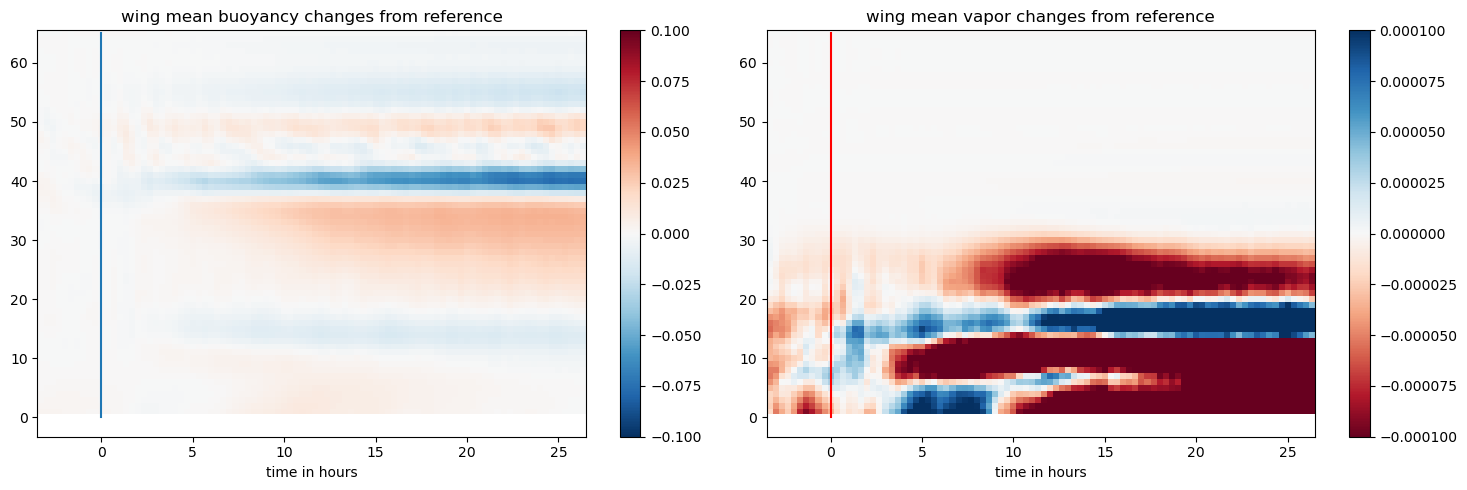

In [355]:
# WING MEAN VALUES: BUOYANCY AND VAPOR

refbprofile = ds3d.buoyancy[0:10].mean(dim=['time','nj','ni'])
refqvprofile =ds3d.qv      [0:10].mean(dim=['time','nj','ni'])

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z, (wingmean.buoyancy - refbprofile).transpose() , 
               cmap='RdBu_r', vmin=-0.1, vmax=0.1); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('wing mean buoyancy changes from reference');

plt.subplot(122) 
plt.pcolormesh(t,z, (wingmean.qv - refqvprofile).transpose() , cmap='RdBu', vmin=-1e-4, vmax=1e-4); 
plt.colorbar();
plt.plot([0,0],[0,65],'red')
plt.xlabel('time in hours')
plt.title('wing mean vapor changes from reference');

plt.tight_layout()

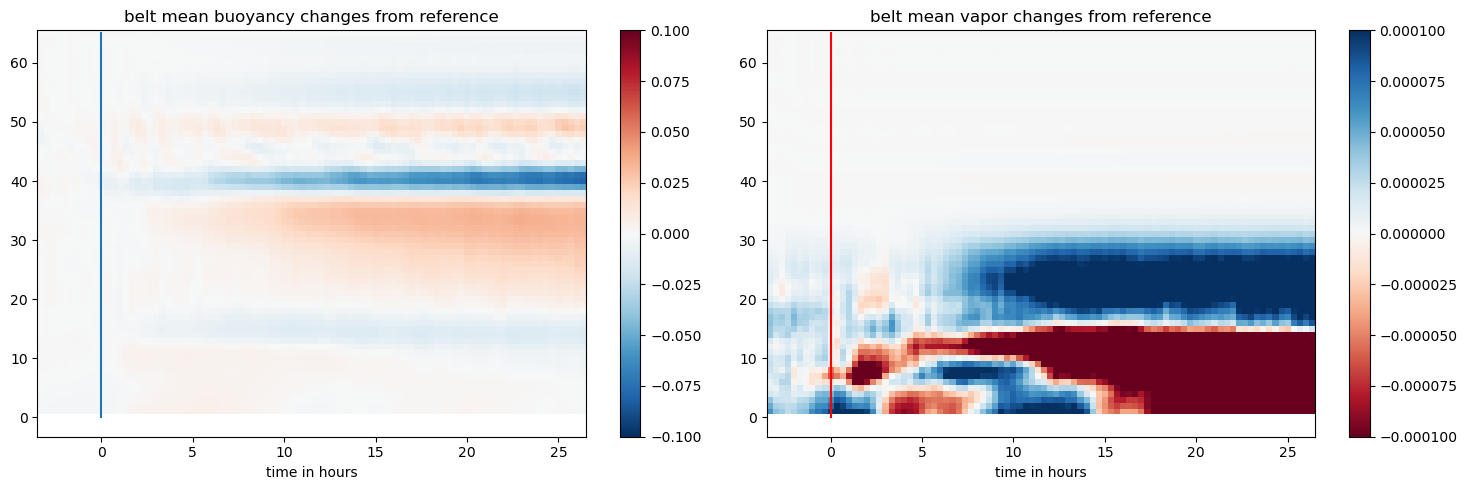

In [356]:
# belt MEAN VALUES: BUOYANCY AND VAPOR

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z, (beltmean.buoyancy - refbprofile).transpose() , 
               cmap='RdBu_r', vmin=-0.1, vmax=0.1); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt mean buoyancy changes from reference');

plt.subplot(122) 
plt.pcolormesh(t,z, (beltmean.qv - refqvprofile).transpose() , cmap='RdBu', vmin=-1e-4, vmax=1e-4); 
plt.colorbar();
plt.plot([0,0],[0,65],'red')
plt.xlabel('time in hours')
plt.title('belt mean vapor changes from reference');

plt.tight_layout()

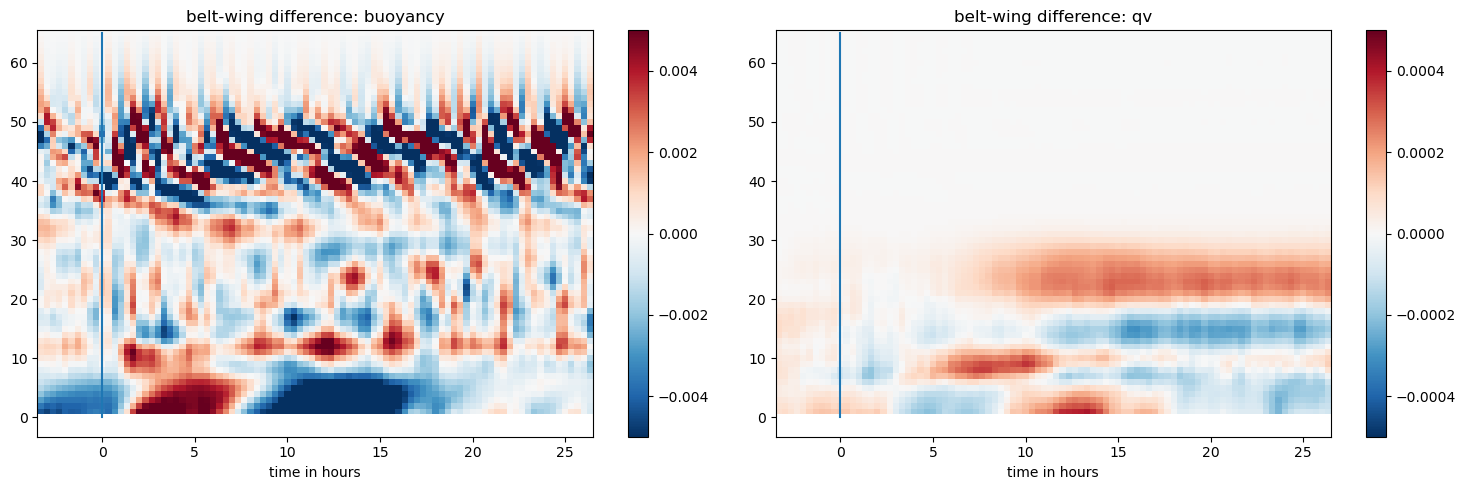

In [319]:
# Belt-wing differences as function of time: Buoyancy and qv

beltdiff = beltmean-wingmean

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z, beltdiff.buoyancy.rolling(time=1).mean().transpose() , cmap='RdBu_r', vmin = -5e-3, vmax=5e-3); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt-wing difference: buoyancy');

plt.subplot(122)
plt.pcolormesh(t,z, beltdiff.qv.transpose() , cmap='RdBu_r', vmin = -5e-4, vmax=5e-4); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt-wing difference: qv');

plt.tight_layout()

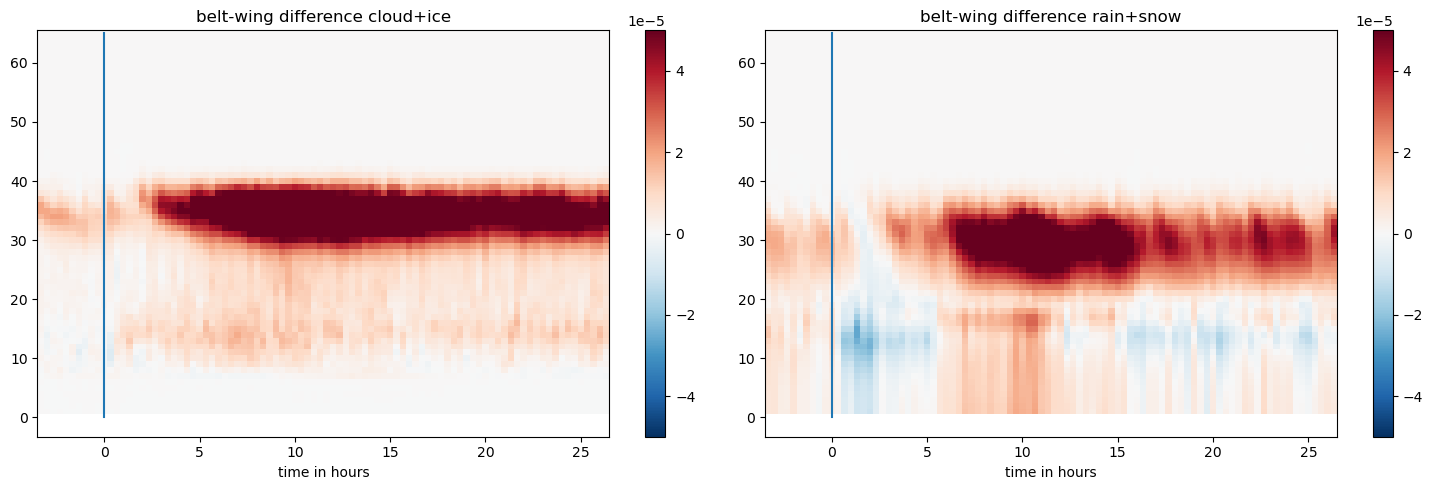

In [318]:
beltdiff = beltmean-wingmean

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z, (beltdiff.qc + beltdiff.qi).transpose() , cmap='RdBu_r', vmin = -5e-5, vmax=5e-5); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt-wing difference cloud+ice');

plt.subplot(122)
plt.pcolormesh(t,z, (beltdiff.qr + beltdiff.qs).transpose() , cmap='RdBu_r', vmin = -5e-5, vmax=5e-5); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt-wing difference rain+snow');

plt.tight_layout()

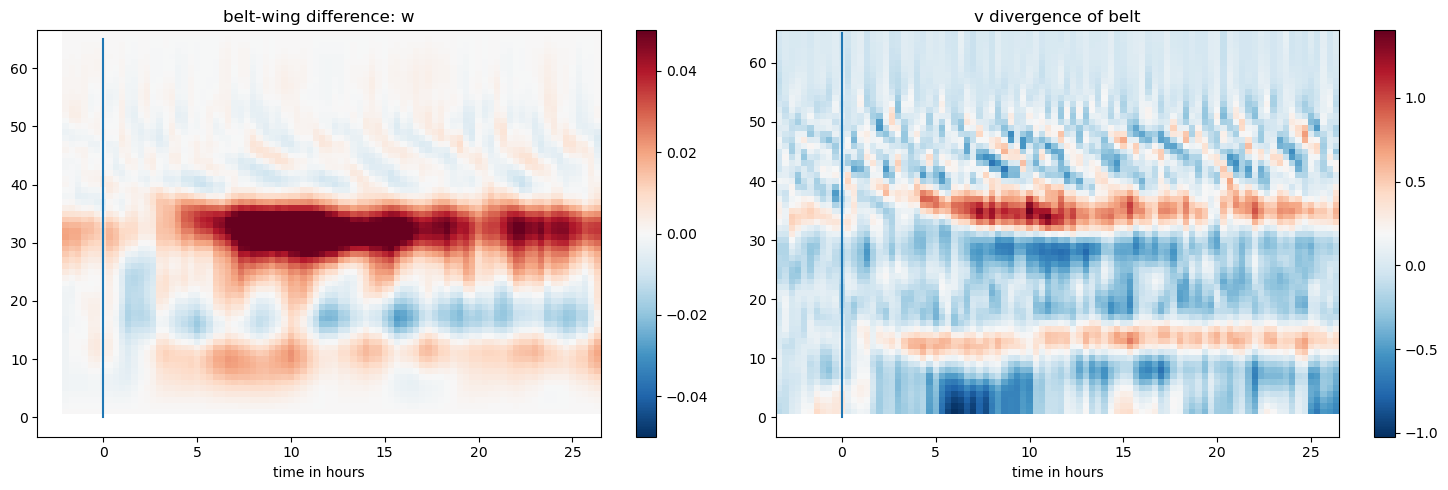

In [324]:
# w and v-convergence 
z1 = np.arange(1,67,1)
wingdiffv =(ds3d.v.isel(njp1=slice(25,29)).mean('njp1')*0.5 - ds3d.v.isel(njp1=slice(91,95)).mean('njp1')*0.5) .mean('ni')

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.pcolormesh(t,z1, beltdiff.w.rolling(time=5).mean().transpose() , cmap='RdBu_r', vmin = -5e-2, vmax=5e-2); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('belt-wing difference: w');

plt.subplot(122)
plt.pcolormesh(t,z, -wingdiffv.transpose() , cmap='RdBu_r'); plt.colorbar()
plt.plot([0,0],[0,65])
plt.xlabel('time in hours')
plt.title('v divergence of belt');

plt.tight_layout()

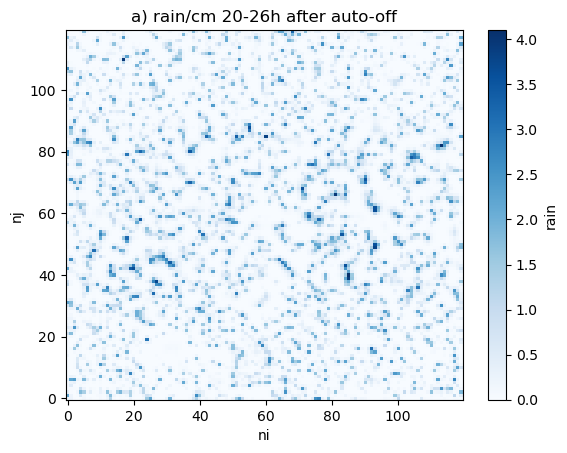

In [538]:
(ds.rain[360]-ds.rain[342]).plot(cmap='Blues'); 
plt.title('a) rain/cm 20-26h after auto-off');

In [559]:
ds['cwp'].mean('ni')[170:260]

<xarray.DataArray 'cwp' (time: 90, nj: 120)>
array([[0.01571326, 0.01626252, 0.04635788, ..., 0.02546643, 0.01677871,
        0.03787813],
       [0.01635796, 0.03871036, 0.06340303, ..., 0.01113017, 0.025821  ,
        0.02449978],
       [0.02798622, 0.03387891, 0.01555459, ..., 0.02553818, 0.0253088 ,
        0.02522426],
       ...,
       [0.01065743, 0.02635079, 0.05575672, ..., 0.01974271, 0.07331669,
        0.08933169],
       [0.00741868, 0.03230383, 0.06053643, ..., 0.03612614, 0.04581471,
        0.06059236],
       [0.00426125, 0.00774662, 0.03708686, ..., 0.05604168, 0.01209587,
        0.01675192]], dtype=float32)
Coordinates:
  * time     (time) timedelta64[ns] 2 days 08:40:00 ... 3 days 14:20:00
Dimensions without coordinates: nj

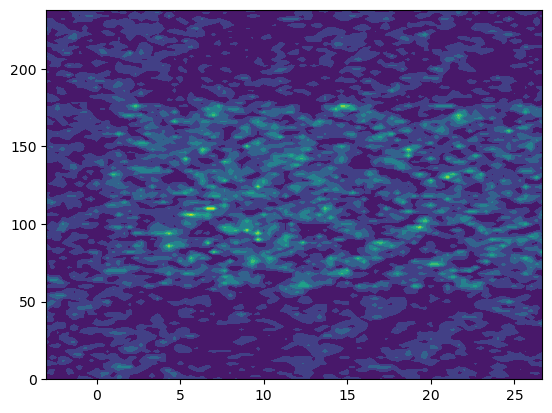

In [578]:
time_lat = ds['cwp'].mean('ni')[170:260].transpose()
tt = np.arange(-3, 27, 1./3.)  
yy = np.arange(0, 240, 2)  
plt.contourf(tt,yy,time_lat); 

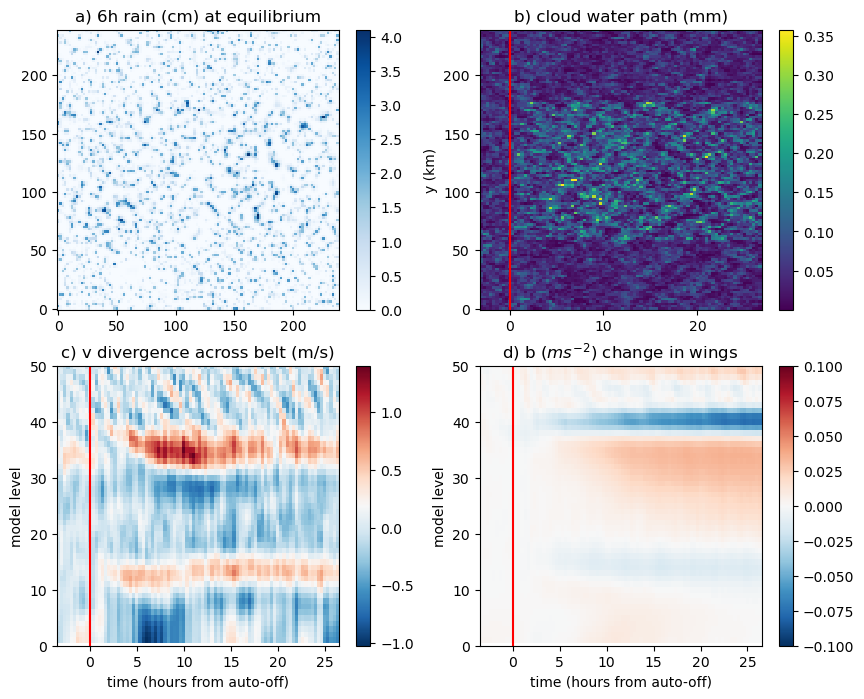

In [620]:
# Figure for paper 
plt.figure( figsize=(10,8) )

plt.subplot(221)
plt.pcolormesh(yy,yy,(ds.rain[360]-ds.rain[342]),cmap='Blues'); plt.colorbar()
plt.title('a) 6h rain (cm) at equilibrium');

plt.subplot(222)
time_lat = ds['cwp'].mean('ni')[170:260].transpose()
tt = np.arange(-3, 27, 1./3.)  
yy = np.arange(0, 240, 2)  
plt.pcolormesh(tt,yy,time_lat); 
plt.ylabel('y (km)')
plt.title('b) cloud water path (mm)'); plt.colorbar();
plt.plot([0,0],[0,239], 'red')

plt.subplot(223)
plt.pcolormesh(t,z, -wingdiffv.transpose() , cmap='RdBu_r'); plt.colorbar()
plt.plot([0,0],[0,65],'red')
plt.xlabel('time (hours from auto-off)')
plt.ylabel('model level'); plt.ylim([0,50])
plt.title('c) v divergence across belt (m/s)');

plt.subplot(224)
allmean = (beltmean+wingmean)/2
plt.pcolormesh(t,z, (wingmean.buoyancy - refbprofile).transpose() , 
               cmap='RdBu_r', vmin=-0.1, vmax=0.1); plt.colorbar()
plt.plot([0,0],[0,65],'red')
plt.xlabel('time (hours from auto-off)')
plt.ylabel('model level'); plt.ylim([0,50])
plt.title('d) b ($m s^{-2}$) change in wings');


In [607]:
ds3d.buoyancy

<xarray.DataArray 'buoyancy' (time: 90, nk: 65, nj: 120, ni: 120)>
array([[[[0.064716, ..., 0.077584],
         ...,
         [0.080932, ..., 0.070747]],

        ...,

        [[0.005823, ..., 0.005695],
         ...,
         [0.005683, ..., 0.005414]]],


       ...,


       [[[0.068363, ..., 0.071886],
         ...,
         [0.070137, ..., 0.071015]],

        ...,

        [[0.004221, ..., 0.004818],
         ...,
         [0.004012, ..., 0.004625]]]], dtype=float32)
Coordinates:
  * time     (time) timedelta64[ns] 2 days 08:20:00 ... 3 days 14:00:00
Dimensions without coordinates: nk, nj, ni
Attributes:
    long_name:     buoyancy
    units:         m/s^2
    cell_methods:  time: mean

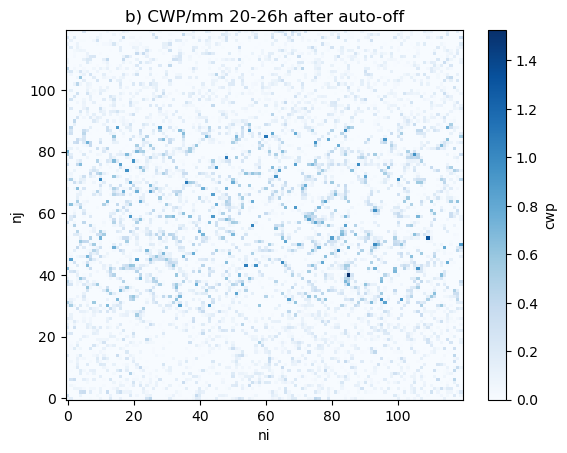

In [547]:
(ds.cwp[342:360]).mean(dim='time').plot(cmap='Blues'); 
plt.title('b) CWP/mm 20-26h after auto-off');